# Laboratorio 2: Parte 2
- Daniel Armando Valdez Reyes - 21240 [@Danval-003](https://github.com/Danval-003)
- Emilio José Solano Orozco - 21212 [@emiliosolanoo21](https://github.com/emiliosolanoo21)

Link de github - [https://github.com/Danval-003/Redes-2-2](https://github.com/Danval-003/Redes-2-2)

### Esquemas de detección y corrección de errores

Para la práctica, se aplicaron algoritmos de detección y corrección de errores utilizando los métodos Hamming y Fletcher. Se simuló ruido en la transmisión para evaluar la efectividad de estos algoritmos. Las pruebas se realizaron enviando y recibiendo datos a través de sockets, variando el tamaño de las cadenas enviadas y la probabilidad de error.

## Pruebas

Se realizaron varias pruebas, alrededor de mil entradas de prueba para cada algoritmo. Se probó con una probabilidad de 0.1 y con cadenas con un rango entre 5 a 30 caracteres. 

In [1]:
import pandas as pd
import json
from tabulate import tabulate
import matplotlib.pyplot as plt
import IPython.display as display

# load the data on results.json
# Index(['identifier', 'message', 'noiseMessage', 'changes'], dtype='object')
with open('results.json', 'r') as file:
    data = json.load(file)

# load the data on results_receptor.json
#Index(['identifier', 'message', 'method', 'originalMessage', 'success'], dtype='object')
with open('results_receptor.json', 'r') as file:
    data_receptor = json.load(file)

# Combine the data using the identifier
results = []
for i in range(len(data)):
    for j in range(len(data_receptor)):
        if data[i]['identifier'] == data_receptor[j]['identifier']:
            if data_receptor[j]['method'] == 'Fletcher':
                data[i]['message'] = data[i]['message']
            
            results.append({
                'identifier': data[i]['identifier'],
                'message': data[i]['message'],
                'noiseMessage': data[i]['noiseMessage'],
                'changes': data[i]['changes'],
                'method': data_receptor[j]['method'],
                'originalMessage': data_receptor[j]['originalMessage'],
                'success': data_receptor[j]['success'],
                'successEval': data_receptor[j]['message'] == data[i]['message']
            })


# Create a DataFrame
df = pd.DataFrame(results)
display.display(df)


,identifier,message,noiseMessage,changes,method,originalMessage,success,successEval
0,ee720012-2c0c-4605-8999-43b0bc2042fb,Risk act left fire.,1110110100010011001001011100110111010110010000...,2,Hamming,1101101000100110010010111001101110101100100000...,True,False
1,66cd6373-1f09-416f-aa27-f29f051c3436,Buy.,101001001001001101010101111001000101110,0,Hamming,01001001001001101010101111001000101110,True,True
2,023649c0-852c-4100-8873-967e1804054f,Front.,1110110000110011110010011001110101011100111010...,1,Hamming,1101100001100111100100110011101010111001110100...,True,True
3,aa16e187-6d8b-41c9-a19c-1ea45263708e,Better still kid.,1000010010010011100101011101000101101000110010...,1,Hamming,0000100100100111001010111010001011010001100101...,True,True
4,48fd941d-dff9-494a-8065-fb88974f49b4,Fact walk seat.,1010110010110001100001011000110101101000010000...,2,Hamming,0101100101100011000010110001101011010000100000...,True,False
...,...,...,...,...,...,...,...,...
1935,a3ec96a6-79e6-48a9-8b58-ef8c07dea0e4,Type majority.,0001111000101010001111001011100000110010100100...,1,Fletcher,0011110001010100011110010111000001100101001000...,False,False
1936,8bc5d3fb-a3c2-48b4-8b78-fdad47cf5db4,Race medical.,0111011000101001001100000011000110110010100100...,1,Fletcher,1110110001010010011000000110001101100101001000...,False,False
1937,b51ef88e-2f7f-451f-a228-e2516c84ca81,Many room art.,0110111000100110101100001011011100111100100100...,1,Fletcher,1101110001001101011000010110111001111001001000...,False,False
1938,bdb96334-bba9-443a-b028-495dff038bcf,Who.,00011110101010111011010000110111100101110,0,Fletcher,0011110101010111011010000110111100101110,True,True


## Hamming 
### → Efectividad. 

Según la gráfica muestra que de los mensajes retornados, el 100% de los mensajes que tuvieron 1 o 0 cambios fueron correctos. Esto quiere decir que el algoritmo funciona correctamente al corregir el mensaje en caso haya un error. Pero se denota que más de un cambio da error. 

+----------+---------+--------+
| method   |   False |   True |
|----------+---------+--------|
| Fletcher |     583 |    366 |
| Hamming  |      66 |    925 |
+----------+---------+--------+
+-----------+---------+--------+
|   changes |   False |   True |
|-----------+---------+--------|
|         0 |       0 |    328 |
|         1 |       0 |    321 |
|         2 |     200 |      0 |
|         3 |      93 |      0 |
|         4 |      38 |      0 |
|         5 |       9 |      0 |
|         6 |       1 |      0 |
|         7 |       1 |      0 |
+-----------+---------+--------+


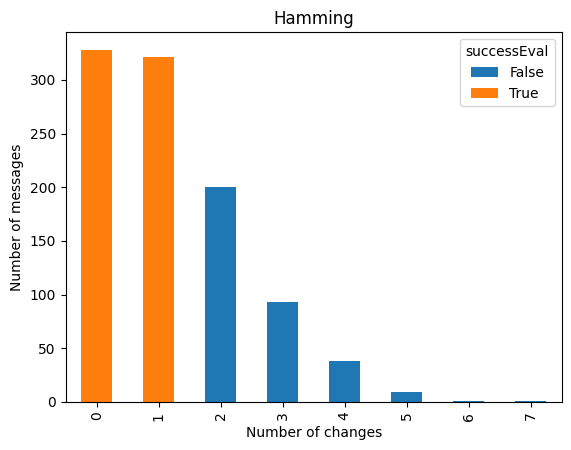

In [2]:

df_info = df.groupby(['method', 'success']).size().unstack(fill_value=0)
print(tabulate(df_info, headers='keys', tablefmt='psql'))

# Divide the data into two groups, for method "Hamming" and "Fletcher"
df_hamming = df[df['method'] == 'Hamming']
df_fletcher = df[df['method'] == 'Fletcher']

# With hamming
# Sum number of not success for each number of changes
df_hamming_Succes_changes = df_hamming.groupby(['changes', 'successEval']).size().unstack(fill_value=0)

print(tabulate(df_hamming_Succes_changes, headers='keys', tablefmt='psql'))
# Graph this
df_hamming_Succes_changes.plot(kind='bar', stacked=True)
plt.title('Hamming')
plt.xlabel('Number of changes')
plt.ylabel('Number of messages')
plt.show()



## Hamming 
### → Eficacia. 

Según la gráfica muestra que de los mensajes obtenidos. Acepto gran parte de los mensajes con errores y por ende dejo pasar fallas.

Se probó de nuevo pero con una probabilidad de 0.01. Y se obtuvieron los mismos resultados. 

+-----------+---------+--------+
|   changes |   False |   True |
|-----------+---------+--------|
|         0 |       0 |    284 |
|         1 |       0 |    293 |
|         2 |      44 |    145 |
|         3 |      15 |     62 |
|         4 |       7 |     28 |
|         5 |       2 |      5 |
|         6 |       0 |      5 |
|         7 |       0 |      2 |
+-----------+---------+--------+


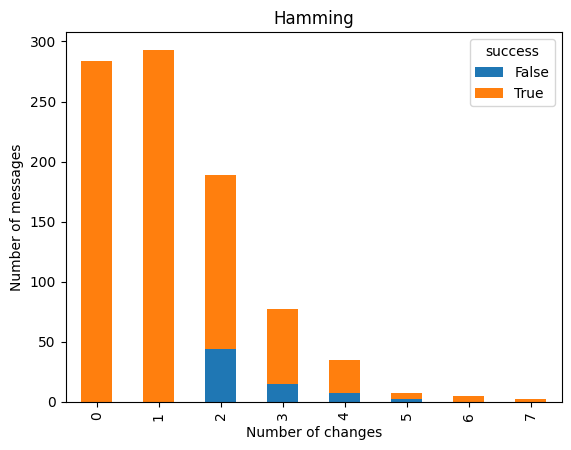

In [7]:
# With hamming
# Sum number of not success for each number of changes
df_hamming_Succes_changes = df_hamming.groupby(['changes', 'success']).size().unstack(fill_value=0)

print(tabulate(df_hamming_Succes_changes, headers='keys', tablefmt='psql'))
# Graph this
df_hamming_Succes_changes.plot(kind='bar', stacked=True)
plt.title('Hamming')
plt.xlabel('Number of changes')
plt.ylabel('Number of messages')
plt.show()


In [4]:
# load the data on results.json
# Index(['identifier', 'message', 'noiseMessage', 'changes'], dtype='object')
with open('hamming_results.json', 'r') as file:
    data = json.load(file)

# load the data on results_receptor.json
#Index(['identifier', 'message', 'method', 'originalMessage', 'success'], dtype='object')
with open('hamming_results_receptor.json', 'r') as file:
    data_receptor = json.load(file)

# Combine the data using the identifier
results = []
for i in range(len(data)):
    for j in range(len(data_receptor)):
        if data[i]['identifier'] == data_receptor[j]['identifier']:
            if data_receptor[j]['method'] == 'Fletcher':
                data[i]['message'] = data[i]['message']
            
            results.append({
                'identifier': data[i]['identifier'],
                'message': data[i]['message'],
                'noiseMessage': data[i]['noiseMessage'],
                'changes': data[i]['changes'],
                'method': data_receptor[j]['method'],
                'originalMessage': data_receptor[j]['originalMessage'],
                'success': data_receptor[j]['success'],
                'successEval': data_receptor[j]['message'] == data[i]['message']
            })


# Create a DataFrame
df_hamming = pd.DataFrame(results)
display.display(df)


,identifier,message,noiseMessage,changes,method,originalMessage,success,successEval
0,ee720012-2c0c-4605-8999-43b0bc2042fb,Risk act left fire.,1110110100010011001001011100110111010110010000...,2,Hamming,1101101000100110010010111001101110101100100000...,True,False
1,66cd6373-1f09-416f-aa27-f29f051c3436,Buy.,101001001001001101010101111001000101110,0,Hamming,01001001001001101010101111001000101110,True,True
2,023649c0-852c-4100-8873-967e1804054f,Front.,1110110000110011110010011001110101011100111010...,1,Hamming,1101100001100111100100110011101010111001110100...,True,True
3,aa16e187-6d8b-41c9-a19c-1ea45263708e,Better still kid.,1000010010010011100101011101000101101000110010...,1,Hamming,0000100100100111001010111010001011010001100101...,True,True
4,48fd941d-dff9-494a-8065-fb88974f49b4,Fact walk seat.,1010110010110001100001011000110101101000010000...,2,Hamming,0101100101100011000010110001101011010000100000...,True,False
...,...,...,...,...,...,...,...,...
1935,a3ec96a6-79e6-48a9-8b58-ef8c07dea0e4,Type majority.,0001111000101010001111001011100000110010100100...,1,Fletcher,0011110001010100011110010111000001100101001000...,False,False
1936,8bc5d3fb-a3c2-48b4-8b78-fdad47cf5db4,Race medical.,0111011000101001001100000011000110110010100100...,1,Fletcher,1110110001010010011000000110001101100101001000...,False,False
1937,b51ef88e-2f7f-451f-a228-e2516c84ca81,Many room art.,0110111000100110101100001011011100111100100100...,1,Fletcher,1101110001001101011000010110111001111001001000...,False,False
1938,bdb96334-bba9-443a-b028-495dff038bcf,Who.,00011110101010111011010000110111100101110,0,Fletcher,0011110101010111011010000110111100101110,True,True


+-----------+---------+--------+
|   changes |   False |   True |
|-----------+---------+--------|
|         0 |       0 |    284 |
|         1 |       0 |    293 |
|         2 |      44 |    145 |
|         3 |      15 |     62 |
|         4 |       7 |     28 |
|         5 |       2 |      5 |
|         6 |       0 |      5 |
|         7 |       0 |      2 |
+-----------+---------+--------+


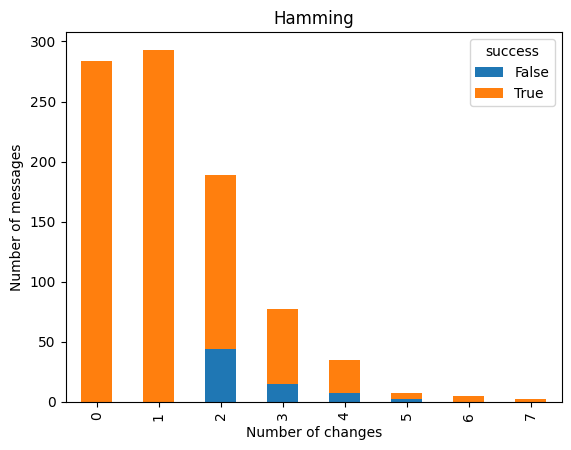

In [5]:
# With hamming
# Sum number of not success for each number of changes
df_hamming_Succes_changes = df_hamming.groupby(['changes', 'success']).size().unstack(fill_value=0)

print(tabulate(df_hamming_Succes_changes, headers='keys', tablefmt='psql'))
# Graph this
df_hamming_Succes_changes.plot(kind='bar', stacked=True)
plt.title('Hamming')
plt.xlabel('Number of changes')
plt.ylabel('Number of messages')
plt.show()


## Feltcher 
### → Eficacia. 

Según la gráfica muestra que de los mensajes obtenidos. Tiene un 100% de eficacia en este caso. Dado que no no acepta ningun mensaje con minimo un error. 

+-----------+---------+--------+
|   changes |   False |   True |
|-----------+---------+--------|
|         0 |       0 |    332 |
|         1 |     279 |      0 |
|         2 |     210 |      0 |
|         3 |      86 |      0 |
|         4 |      27 |      0 |
|         5 |       8 |      0 |
|         6 |       6 |      0 |
|         7 |       1 |      0 |
+-----------+---------+--------+


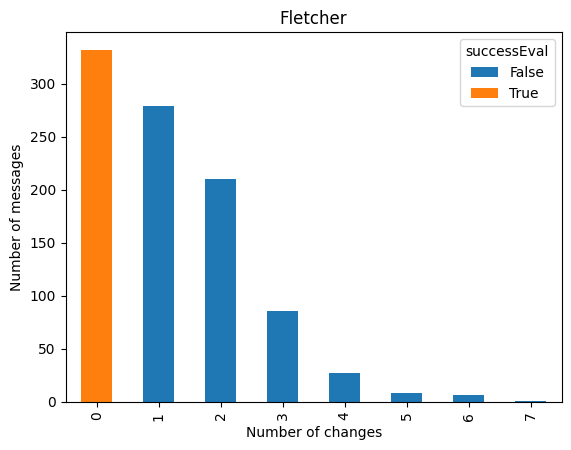

In [6]:
# With Fletcher
# Sum number of not success for each number of changes
df_fletcher_Succes_changes = df_fletcher.groupby(['changes', 'successEval']).size().unstack(fill_value=0)

print(tabulate(df_fletcher_Succes_changes, headers='keys', tablefmt='psql'))
# Graph this
df_fletcher_Succes_changes.plot(kind='bar', stacked=True)
plt.title('Fletcher')
plt.xlabel('Number of changes')
plt.ylabel('Number of messages')
plt.show()

## Conclusion
La discusión se centró en comparar la efectividad de los algoritmos. Se concluyó que Hamming es eficaz para corregir errores simples, mientras que Fletcher es más estricto y no permite mensajes con errores. La flexibilidad de Hamming permite aceptar mayores tasas de error, pero con el riesgo de dejar pasar fallos. Fletcher es más adecuado cuando es crucial no permitir errores.

En conclusión, ambos algoritmos tienen sus ventajas y desventajas. Hamming es útil para escenarios donde se esperan pocos errores y se necesita corrección rápida. Fletcher es más adecuado para situaciones donde la precisión es crítica y no se pueden permitir errores. La elección del algoritmo depende del contexto y los requisitos específicos de la transmisión de datos.
